# 4. Semi-supervised EM

Expectation Maximization (EM) is a classical algorithm for unsupervised learning (i.e., learning with hidden or latent variables). In this problem we will explore one of the ways in which EM algorithm can be adapted to the semi-supervised setting, where we have some labelled examples along with unlabelled examples.

In the standard unsupervised setting, we have $m\in\mathbb{N}$ unlabelled examples $\{x^{(1)},\ldots,x^{(m)}\}$. We wish to learn the parameters of $p(x,z;\theta)$ from the data, but $z^{(i)}$'s are not observed. The classical EM algorithm is designed for this very purpose, where we maximize the intractable $p(x;\theta)$ indirectly by iteratively performing the E-step and M-step, each time maximizing a tractable lower bound of $p(x;\theta)$. Our objective can be concretely written as:

\begin{align*}
\ell_{unsup}(\theta) 
& = \sum_{i=1}^m\log p(x^{(i)};\theta)\\
& = \sum_{i=1}^m\log \sum_{z}p(x^{(i)},z^{(i)};\theta).
\end{align*}

Now, we will attempt to construct an extension of EM to the semi-supervised setting. Let us suppose we have an additional $\tilde{m}\in\mathbb{N}$ labelled examples $\{(\tilde{x}^{(1)},\tilde{z}^{(1)}),\ldots,(\tilde{x}^{(\tilde{m})},\tilde{z}^{(\tilde{m})})\}$ where both $x$ and $z$ are observed. We want to simultaneously maximize the marginal likelihood of the parameters using the unlabelled examples, and full likelihood of the parameters using the labelled examples, by optimizing their weighted sum (with some hyperparameter $\alpha$). More concretely, our semi-supervised objective $\ell_{semi-unsup}(\theta)$ can be written as:

\begin{align*}
\ell_{sup}(\theta) 
& = \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta)
\end{align*}

\begin{align*}
\ell_{semi-sup}(\theta) 
& = \ell_{unsup}(\theta)  + \alpha\ell_{sup}(\theta).
\end{align*}

We can derive the EM steps for the semi-supervised setting using the same approach and steps as before. You are strongly encouraged to show to yourself (no need to include in the write-up) that we end up with:

## E-step (semi-supervised)

For each $i\in\{1,\ldots,m\}$, set
\begin{align*}
Q_{i}^{(t)}(z^{(i)}) := p(z^{(i)}|x^{(i)};\theta^{(t)}).
\end{align*}

## M-step (semi-supervised)


For each $i\in\{1,\ldots,m\}$, set
\begin{align*}
\theta^{(t+1)} =\arg\max_{\theta}\left[\sum_{i=1}^m\left(\sum_{z^{(i)}}
Q_{i}^{(t)}(z^{(i)})\log \frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}^{(t)}(z^{(i)})}\right) +\left(\sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta)\right) \right].
\end{align*}

## (a) [5 points] Convergence. 

First we will show that this algorithm eventually converges. In order to prove this, it is sufficient to show that our semisupervised objective $\ell_{semi-sup}(\theta)$ monotonically increases with each iteration of E and M step. Specifically, let $\theta^{(t)}$ be the parameters obtained at the end of $t$ EM-steps. Show that 

\begin{align*}
\ell_{semi-sup}(\theta^{(t+1)})\geq \ell_{semi-sup}(\theta^{(t)}). 
\end{align*}

### Answer:

\begin{align*}
\ell_{semi-sup}(\theta^{(t+1)}) 
& = \ell_{unsup}(\theta^{(t+1)})  + \alpha\ell_{sup}(\theta^{(t+1)})\\
& = \sum_{i=1}^m\log \sum_{z^{(i)}}p(x^{(i)},z^{(i)};\theta^{(t+1)}) + \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t+1)})\\
& = \sum_{i=1}^m\log \sum_{z^{(i)}}Q_{i}^{(t)}(z^{(i)})\frac{p(x^{(i)},z^{(i)};\theta^{(t+1)})}{Q_{i}^{(t)}(z^{(i)})} + \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t+1)})\\
& \geq \sum_{i=1}^m \sum_{z^{(i)}}Q_{i}^{(t)}(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\theta^{(t+1)})}{Q_{i}^{(t)}(z^{(i)})} + \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t+1)})\\
& \geq \sum_{i=1}^m \sum_{z^{(i)}}Q_{i}^{(t)}(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\theta^{(t)})}{Q_{i}^{(t)}(z^{(i)})} + \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t)})\\
& = \ell_{semi-sup}(\theta^{(t)}),
\end{align*}

where the first inequality comes from the fact that $\log(.)$ is a concave function, the second one is true because of how we have chosen $\theta^{(t+1)}$, and the last equality holds since, in E-step, we set $Q$'s in a way that this equality gets true. 

## Semi-supervised GMM

Now we will revisit the Gaussian Mixture Model (GMM), to apply our semi-supervised EM algorithm. Let us consider a scenario where data is generated from $k\in\mathbb{N}$ Gaussian distributions, with unknown means $\mu_j\in \mathbb{R}^d$ and covariances $\Sigma_j\in \mathbb{S}^d_+$ where $j\in\{1,\ldots,k\}$. We have $m$ data points 
$x^{(i)}\in \mathbb{R}^d$, $i\in\{1,\ldots,m\}$, and each data point has a corresponding latent (hidden/unknown) variable $z^{(i)}\in \{1,\ldots,k\}$ indicating which distribution $x^{(i)}$ belongs to. Specifically, 
$z^{(i)}\sim {\rm Multinomial}(\phi)$, such that $\sum_{j=1}^k\phi_j =1$ and $\phi_j\geq 0$ for all $j$ and 
$x^{(i)}|z^{(i)}\sim \mathcal{N}(\mu_{z^{(i)}},\Sigma_{z^{(i)}})$
i.i.d. So, $\mu, \Sigma$, and $\phi$ are the model parameters.

We also have an additional $\tilde{m}$ data points $\tilde{x}^{(i)}\in \mathbb{R}^d$, $i\in\{1,\ldots,\tilde{m}\}$, and an associated observed variable $\tilde{z}\in\{1,\ldots,k\}$ indicating the distribution $x^{(i)}$ belong to.
Note that $\tilde{z}^{(i)}$ are known constants (in contrast to $z^{(i)}$ which are unknown random variables). As before, we assume $\tilde{x}^{(i)}|\tilde{z}^{(i)}\sim \mathcal{N}(\mu_{\tilde{z}^{(i)}},\Sigma_{\tilde{z}^{(i)}})$ i.i.d.

In summary we have $m+\tilde{m}$ examples, of which $m$ are unlabelled data points $x$'s with unobserved $z$'s and $m$ are labelled data points $\tilde{x}^{(i)}$ with corresponding observed labels $\tilde{z}^{(i)}$.
The traditional EM algorithm is designed to take only the $m$ unlabelled examples as input, and learn the model parameters $\mu, \Sigma$, and $\phi$.

Our task now will be to apply the semi-supervised EM algorithm to GMMs in order to leverage the additional $\tilde{m}$ labelled examples, and come up with semi-supervised E-step and M-step update rules specific to GMMs. Whenever required, you can cite the lecture notes for derivations and steps.

## (b) [5 points] Semi-supervised E-Step. 

Clearly state which are all the latent variables that need to be re-estimated in the E-step. Derive the E-step to re-estimate all the stated latent variables. Your final E-step expression must only involve $x,z,\mu, \Sigma,\phi$ and universal constants.

### Answer:

Latent variables are $z^{(i)}$ for $i\in\{1,\ldots,m\}$. 

\begin{align*}
\ell_{semi-sup}(\theta^{(t)}) 
& = \ell_{unsup}(\theta^{(t)})  + \alpha \ell_{sup}(\theta^{(t)})\\
& = \sum_{i=1}^m\log \sum_{z}p(x^{(i)},z^{(i)};\theta^{(t)}) + \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t)})\\
& = \sum_{i=1}^m\log \sum_{z}Q_{i}^{(t)}(z^{(i)})\frac{p(x^{(i)},z^{(i)};\theta^{(t+1)})}{Q_{i}^{(t)}(z^{(i)})} + \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t)})\\
& \geq \sum_{i=1}^m \sum_{z}Q_{i}^{(t)}(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\theta^{(t)})}{Q_{i}^{(t)}(z^{(i)})} + \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t)})\\
& = J(Q^{(t)},\theta^{(t)}).
\end{align*}

Note that we first start with a random $\theta^{(0)}$ and then we are looking for a $Q^{(t)}$ such that $\ell_{semi-sup}(\theta^{(t)})=J(Q^{(t)},\theta^{(t)})$. 
Follwoing the same approch as in Lectute note, we come up with the follwoing update rule:

\begin{align*}
{\omega_j^{(i)}}^{(t)} 
& = Q_i^{(t)}(z=j) \\ \\
& = p\left(z=j|x^{(i)};\phi^{(t)}, \mu^{(t)}, \Sigma^{(t)}\right)\\ \\
& = \frac{p\left(x^{(i)}|z=j;\mu^{(t)}, \Sigma^{(t)}\right)p\left(z=j;\phi^{(t)}\right)}{\sum_{l=1}^k p\left(x^{(i)}|z=l;\mu^{(t)}, \Sigma^{(t)}\right)p\left(z=l;\phi^{(t)}\right)}\\ \\
& = \frac{\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma_j^{(t)}|^{\frac{1}{2}}}\exp\left\{-\frac{1}{2}\left(x^{(i)}-\mu_j^{(t)}\right)^T{\Sigma^{(t)}_j}^{-1}\left(x^{(i)}-\mu_j^{(t)}\right)\right\}\phi^{(t)}_j}{\sum_{l=1}^k 
\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma_l^{(t)}|^{\frac{1}{2}}}\exp\left\{-\frac{1}{2}\left(x^{(i)}-\mu_l^{(t)}\right)^T{\Sigma^{(t)}_l}^{-1}\left(x^{(i)}-\mu_l^{(t)}\right)\right\}\phi^{(t)}_l}.
\end{align*}


## (c) [5 points] Semi-supervised M-Step. 

Clearly state which are all the parameters that need to be re-estimated in the M-step. Derive the M-step to reestimate all the stated parameters. Specifically, derive closed form expressions for the parameter update rules for $\mu^{(t+1)}, \Sigma^{(t+1)}$, and $\phi^{(t+1)}$ based on the semi-supervised objective.

### Answer:

 The parameters that need to be re-estimated in the M-step are  $\mu_j, \Sigma_j$, and $\phi_j$ for each $j\in\{1,\ldots,k\}$. To derive the update rule, we need to solve the following optimization problem. 
\begin{align*}
\mu^{(t+1)},\Sigma^{(t+1)},\phi^{(t+1)} 
& = {\arg\max}_{\mu,\Sigma,\phi}\sum_{i=1}^m\left\{ \alpha\sum_{j=1}^k{\omega^{(i)}_j}^{(t)}\log\frac{p(x^{(i)},z^{(i)}=j;\mu,\Sigma,\phi)}{{\omega^{(i)}_j}^{(t)}} + \alpha\sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\mu,\Sigma,\phi)\right\}\\ \\
& = {\arg\max}_{\mu,\Sigma,\phi}
\left\{\sum_{i=1}^m \sum_{j=1}^k{\omega^{(i)}_j}^{(t)}\log\frac{\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma_j|^{\frac{1}{2}}}\exp\left\{-\frac{1}{2}\left(x^{(i)}-\mu_j\right)^T{\Sigma_j}^{-1}\left(x^{(i)}-\mu_j\right)\right\}p\left(z^{(i)}=j|\phi\right)}{{\omega^{(i)}_j}^{(t)}} + \alpha\sum_{i=1}^{\tilde{m}}\log \left(\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma_{\tilde{z}^{(i)}}^{(t)}|^{\frac{1}{2}}}\exp\left\{-\frac{1}{2}\left(\tilde{x}^{(i)}-\mu_{\tilde{z}^{(i)}}\right)^T{\Sigma_{\tilde{z}^{(i)}}}^{-1}\left(\tilde{x}^{(i)}-\mu_{\tilde{z}^{(i)}}\right)\right\}p\left(\tilde{z}^{(i)};\phi\right)\right)\right\} \\ \\ 
& = {\arg\max}_{\mu,\Sigma,\phi}
\left\{\sum_{i=1}^m \sum_{j=1}^k\left(-\frac{1}{2}{\omega^{(i)}_j}^{(t)}\log|\Sigma_j|-\frac{1}{2}{\omega^{(i)}_j}^{(t)}\left(x^{(i)}-\mu_j\right)^T{\Sigma_j}^{-1}\left(x^{(i)}-\mu_j\right)+{\omega^{(i)}_j}^{(t)}\log \phi_j\right) + 
\alpha\sum_{i=1}^{\tilde{m}}\left(-{\frac{1}{2}}\log |\Sigma_{\tilde{z}^{(i)}}|-\frac{1}{2}\left(\tilde{x}^{(i)}-\mu_{\tilde{z}^{(i)}}\right)^T{\Sigma_{\tilde{z}^{(i)}}}^{-1}\left(\tilde{x}^{(i)}-\mu_{\tilde{z}^{(i)}}\right)+\log \phi_{\tilde{z}^{(i)}}\right) \right\}
\end{align*}
subjet to the constraints $\sum_{j=1}^k\phi_j=1$ and $\phi_j\geq 0$ for each $j\in\{1,\ldots,k\}$.

For simplicity of notation, call this objective function $\mathcal{J}(\mu,\Sigma,\phi)$. Using the method of Lagrange multipliers, we have 

\begin{align*}
\phi^{(t+1)}_j & = {\arg\max}_{\phi,\lambda}\mathcal{L}(\phi,\lambda)
\end{align*}

where 

\begin{align*}
\mathcal{L}(\phi,\lambda) = \sum_{i=1}^m \sum_{j=1}^k {\omega^{(i)}_j}^{(t)}\log \phi_j + \alpha\sum_{i=1}^{\tilde{m}} \log \phi_{\tilde{z}^{(i)}} - \lambda(\sum_{j=1}^k\phi_j -1).
\end{align*}

Thus, setting $\nabla_{\phi_j}\mathcal{L}(\phi,\lambda) = 0$ for each $j\in\{1,\ldots,k\}$ and $\nabla_{\lambda}\mathcal{L}(\phi,\lambda) = 0$, we have 

\begin{align*} 
&\sum_{i=1}^m{\omega^{(i)}_j}^{(t)} +\alpha\sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)} = j\}} =\phi_j\lambda\\
&\sum_{j=1}^k\phi_j = 1.
\end{align*}

Combining these two equalities, we find 
\begin{align*} 
\lambda & = \sum_{i=1}^m\sum_{j=1}^k{\omega^{(i)}_j}^{(t)} +\alpha\sum_{i=1}^{\tilde{m}}\sum_{j=1}^k1_{\{\tilde{z}^{(i)} = j\}}\\
& = m +\alpha\tilde{m}.
\end{align*}
Consequently, 
\begin{equation*} 
\phi_j^{(t+1)} =  \frac{\sum_{i=1}^m{\omega^{(i)}_j}^{(t)} +\alpha\sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)} = j\}}}{m +\alpha\tilde{m}}.
\label{1} \tag{1}
\end{equation*}



Similarly, by setting the derivative of $\mathcal{J}(\mu,\Sigma,\phi)$ with respect to $\mu_j$'s and $\Sigma_j$'s to zero, we obtain:

\begin{align*}
\nabla_{\mu_j}\mathcal{J}(\mu,\Sigma,\phi)
& = {\Sigma_j}^{-1}\left(\sum_{i=1}^m {\omega^{(i)}_j}^{(t)}\left(x^{(i)}-\mu_j\right) + \alpha\sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)} = j\}}\left(\tilde{x}^{(i)}-\mu_{j}\right)\right)\\
& = 0
\end{align*}
which implies 
 
\begin{equation*} 
\mu_j^{(t+1)} =  \frac{\sum_{i=1}^m {\omega^{(i)}_j}^{(t)}x^{(i)} + \alpha\sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)} = j\}}\tilde{x}^{(i)}}{\sum_{i=1}^m {\omega^{(i)}_j}^{(t)} + \alpha\sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)} = j\}}}.
\label{2} \tag{2}
\end{equation*}

And 
\begin{align*}
\nabla_{\Sigma_j}\mathcal{J}(\mu^{t+1},\Sigma,\phi^{t+1})
& = -\frac{1}{2}{\Sigma_j}^{-1}\sum_{i=1}^m{\omega^{(i)}_j}^{(t)} + \frac{1}{2}{\Sigma_j}^{-1}\left(\sum_{i=1}^m{\omega^{(i)}_j}^{(t)}\left(x^{(i)}-\mu_j^{(t+1)}\right)\left(x^{(i)}-\mu_j^{(t+1)}\right)^T\right){\Sigma^{(t)}_j}^{-1}\\
& -\frac{1}{2}\alpha{\Sigma_j}^{-1}\sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)}=j\}} + \frac{1}{2}{\Sigma_j}^{-1}\left(\sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)}=j\}}
\left(\tilde{x}^{(i)}-\mu_j^{(t+1)}\right)\left(\tilde{x}^{(i)}-\mu_j^{(t+1)}\right)^T\right){\Sigma_j}^{-1}\\
& = 0
\end{align*}

which concludes

\begin{equation*}
\Sigma_j^{(t+1)}
= \frac{\sum_{i=1}^m{\omega^{(i)}_j}^{(t)}\left(x^{(i)}-\mu_j^{(t+1)}\right)\left(x^{(i)}-\mu_j^{(t+1)}\right)^T + \sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)}=j\}}
\left(\tilde{x}^{(i)}-\mu_j^{(t+1)}\right)\left(\tilde{x}^{(i)}-\mu_j^{(t+1)}\right)^T}{\sum_{i=1}^m{\omega^{(i)}_j}^{(t)} + \sum_{i=1}^{\tilde{m}}1_{\{\tilde{z}^{(i)}=j\}}}.
\label{3} \tag{3}
\end{equation*}

## (d) [5 points] [Coding Problem] Classical (Unsupervised) EM Implementation. 

For this sub-question, we are only going to consider the $m$ unlabelled examples. Follow the instructions in `src/p03_gmm.py` to implement the traditional EM algorithm, and run it on the unlabelled data-set until convergence.

Run three trials and use the provided plotting function to construct a scatter plot of the resulting assignments to clusters (one plot for each trial). Your plot should indicate cluster assignments with colors they got assigned to (i.e., the cluster which had the highest probability in the final E-step).

__Note:__ You only need to submit the three plots in your write-up. Your code will not be autograded.

### Answer:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from src.p03_gmm import plot_gmm_preds, load_gmm_dataset
%load_ext autoreload
%autoreload 2

In [2]:
def update_w(x, mu, sigma, phi):
    K = len(mu)
    m,n = x.shape
    w = np.zeros((m,K))
    for j in range(K):
        w[:,j] = p_x_given_z(x,j,mu[j],sigma[j])*phi[j]
        #sigma_j_inv = np.linalg.inv(sigma[j])
        #sigma_j_det = np.linalg.det(sigma_j_inv)
        #temp = np.exp(-.5 *np.sum(((x-mu[j])@sigma_j_inv)*(x-mu[j]) , axis = 1))
        #w[:,j] = (2*np.pi)**(n/2)*np.sqrt(sigma_j_det)* phi[j] * temp
    return w/np.sum(w, axis = 1, keepdims=True)

def M_step(x, mu, sigma, phi, w):
    # w.shape = (m,K)
    # x.shape = (m,n)
    phi = np.mean(w, axis = 0)
    mu = list((w.T@x)/np.sum(w, axis = 0).reshape(-1,1))
    for j in range(K):
        sigma[j] = (((x-mu[j])*w[:,j].reshape(-1,1)).T@(x-mu[j]))/np.sum(w[:,j])
    return mu, sigma, phi

In [3]:
def p_x_given_z(x,j,mu_j,sigma_j):
    m,n = x.shape
    sigma_j_inv = np.linalg.inv(sigma_j)
    sigma_j_det = np.linalg.det(sigma_j_inv)
    temp = np.exp(-.5 *np.sum(((x-mu_j)@sigma_j_inv)*(x-mu_j), axis = 1))
    return np.sqrt(sigma_j_det)* temp/((2*np.pi)**(n/2))

def log_likelihood(x,K,mu,sigma,phi, x_tilde=None, z_tilde = None):
    m,_ = x.shape
    p = np.zeros((m,))
    for z in range(K):
        p = p + p_x_given_z(x,z,mu[z],sigma[z])*phi[z]
    p = np.log(p).sum()
    
    
    if x_tilde is not None:
        for z in range(K):
            x_0 = x_tilde[z_tilde.squeeze() == z]
            p += np.log(p_x_given_z(x_0,z,mu[z],sigma[z])*phi[z]).sum()
    return p

In [4]:
PLOT_COLORS = ['red', 'green', 'blue', 'orange']  # Colors for your plots
K = 4         # Number of Gaussians in the mixture model
NUM_TRIALS = 3  # Number of trials to run (can be adjusted for debugging)
UNLABELED = -1  # Cluster label for unlabeled data points (do not change)

log_likelihood_list_1 = []
log_likelihood_list_2 = []

def main(is_semi_supervised, trial_num):
    """Problem 3: EM for Gaussian Mixture Models (unsupervised and semi-supervised)"""
    print('Running {} EM algorithm...'
          .format('semi-supervised' if is_semi_supervised else 'unsupervised'))

    # Load dataset
    train_path = os.path.join('data', 'ds3_train.csv')
    x, z = load_gmm_dataset(train_path)
    x_tilde = None

    if is_semi_supervised:
        # Split into labeled and unlabeled examples
        labeled_idxs = (z != UNLABELED).squeeze()
        x_tilde = x[labeled_idxs, :]   # Labeled examples
        z = z[labeled_idxs, :]         # Corresponding labels
        x = x[~labeled_idxs, :]        # Unlabeled examples

    # *** START CODE HERE ***
    # (1) Initialize mu and sigma by splitting the m data points uniformly at random
    # into K groups, then calculating the sample mean and covariance for each group
    m, n = x.shape 
    P = np.random.randint(K, size = m)
    mu = [np.mean(x[P == i], axis = 0) for i in range(K)] # each entry is of shape (1,n)
    sigma =[np.cov(x[P == i].T) for i in range(K)] #each entry is of shape (n,n)
    
    # (2) Initialize phi to place equal probability on each Gaussian
    # phi should be a numpy array of shape (K,)
    
    phi = 1/K * np.ones((K,))
    
    # (3) Initialize the w values to place equal probability on each Gaussian
    # w should be a numpy array of shape (m, K)
    
    w = 1/K * np.ones((m,K))
    
    # *** END CODE HERE ***

    if is_semi_supervised:
        w = run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma, trial_num)
    else:
        w = run_em(x, w, phi, mu, sigma, trial_num)

    # Plot your predictions
    z_pred = np.zeros(m)
    if w is not None:  # Just a placeholder for the starter code
        for i in range(m):
            z_pred[i] = np.argmax(w[i])
    plot_gmm_preds(x, z_pred, is_semi_supervised, plot_id=trial_num)

In [5]:
def run_em(x, w, phi, mu, sigma, trial_num=None):
    """Problem 3(d): EM Algorithm (unsupervised).

    See inline comments for instructions.

    Args:
        x: Design matrix of shape (m, n).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    eps = 1e-3  # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    LL = []
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        pass  # Just a placeholder for the starter code
        # *** START CODE HERE
        # (1) E-step: Update your estimates in w
        
        w = update_w(x, mu, sigma, phi)
        
        # (2) M-step: Update the model parameters phi, mu, and sigma
        
        mu, sigma, phi = M_step(x, mu, sigma, phi, w)
        
        # (3) Compute the log-likelihood of the data to check for convergence.
        # By log-likelihood, we mean `ll = sum_x[log(sum_z[p(x|z) * p(z)])]`.
        # We define convergence by the first iteration where abs(ll - prev_ll) < eps.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        prev_ll = ll
        ll = log_likelihood(x,K,mu,sigma,phi)
        LL.append(ll)
        it+=1
        # *** END CODE HERE ***
    
    log_likelihood_list_1.append(LL)
    print('converged after {} iterations.'.format(it))
    return w

Running unsupervised EM algorithm...
converged after 165 iterations.
Running unsupervised EM algorithm...
converged after 169 iterations.
Running unsupervised EM algorithm...
converged after 119 iterations.


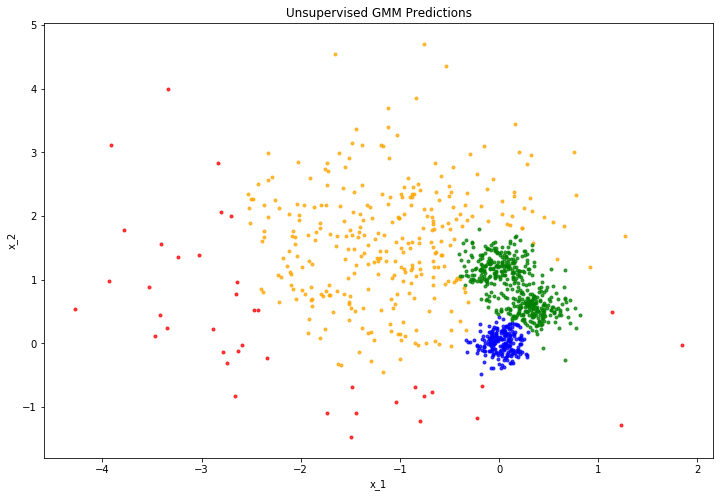

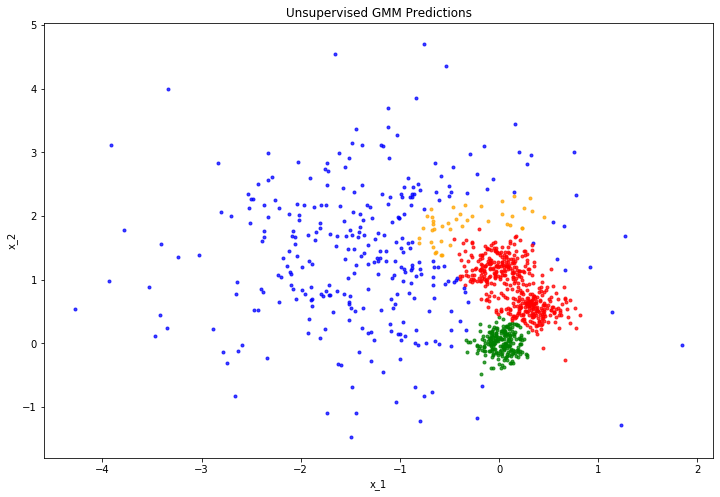

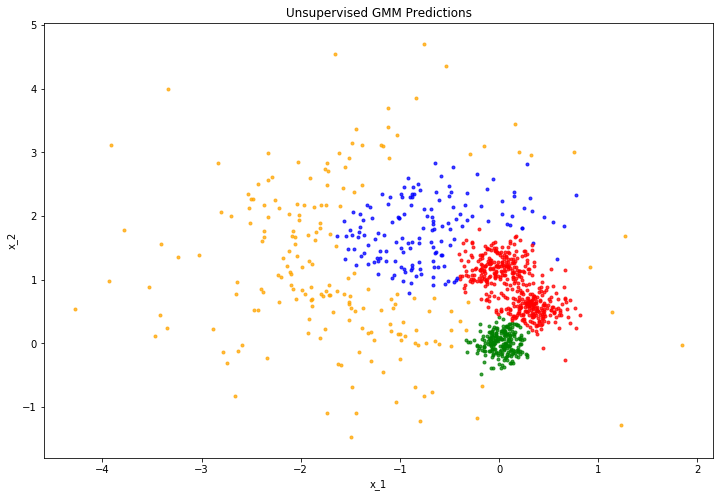

In [6]:
if __name__ == '__main__':
    np.random.seed(229)
    # Run NUM_TRIALS trials to see how different initializations
    # affect the final predictions with and without supervision
    for t in range(NUM_TRIALS):
        main(is_semi_supervised=False, trial_num=t)

        # *** START CODE HERE ***
        # Once you've implemented the semi-supervised version,
        # uncomment the following line.
        # You do not need to add any other lines in this code block.
        # main(with_supervision=True, trial_num=t)
        # *** END CODE HERE ***

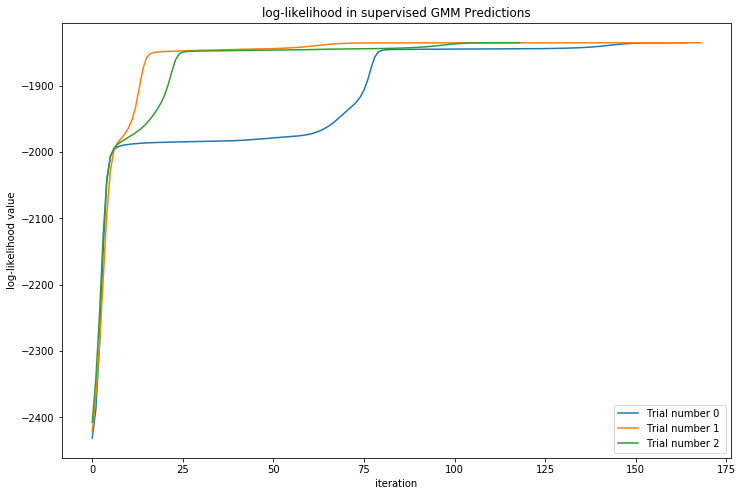

In [7]:
plt.figure(figsize=(12, 8))
plt.title('log-likelihood in supervised GMM Predictions')
plt.xlabel('iteration')
plt.ylabel('log-likelihood value')
for k in range(NUM_TRIALS):
    plt.plot(log_likelihood_list_1[k], label = 'Trial number {} '.format(k))
plt.legend()
plt.show()

## (e) [7 points] [Coding Problem] Semi-supervised EM Implementation. 

Now we will consider both the labelled and unlabelled examples (a total of $m+\tilde{m}$ ), with $5$ labelled examples per cluster. We have provided starter code for splitting the dataset into a matrices $x$ of labelled examples and $x_{tilde}$ of unlabelled examples. Add to your code in `src/p03_gmm.py` to implement the modified EM algorithm, and run it on the dataset until convergence.

Create a plot for each trial, as done in the previous sub-question.

__Note:__ You only need to submit the three plots in your write-up. Your code will not be
autograded.

### Answer:

In [8]:
def M_step_semi(x, w, x_tilde, z_tilde, mu, sigma, phi, alpha):
    # w.shape = (m,K)
    # x.shape = (m,n)
    _, K = w.shape
    m, _ = x.shape
    m_tilde, _ = x_tilde.shape

    w_tilde = np.zeros((m_tilde, K))
    for i in range(K):
        z_tilde = z_tilde.squeeze()
        w_tilde[:,i] = (z_tilde == i)
        
    #print(w_tilde)
    #print(z_tilde)
    
    phi = (np.sum(w, axis = 0) + alpha * np.sum(w_tilde, axis = 0))/(m+alpha*m_tilde)
    
    temp = (w.T@x + alpha * w_tilde.T@x_tilde)/(np.sum(w, axis = 0).reshape(-1,1) + alpha* np.sum(w_tilde, axis = 0).reshape(-1,1))
    mu = list(temp)
    
    for j in range(K):
        temp = ((x-mu[j])*w[:,j].reshape(-1,1)).T@(x-mu[j])+alpha* ((x_tilde-mu[j])*w_tilde[:,j].reshape(-1,1)).T@(x_tilde-mu[j])
        sigma[j] = (temp)/(np.sum(w[:,j])+ alpha*np.sum(w_tilde[:,j]))
    return mu, sigma, phi

In [9]:
def run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma,  trial_num):
    """Problem 3(e): Semi-Supervised EM Algorithm.

    See inline comments for instructions.

    Args:
        x: Design matrix of unlabeled examples of shape (m, n).
        x_tilde: Design matrix of labeled examples of shape (m_tilde, n).
        z: Array of labels of shape (m_tilde, 1).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from semi-supervised EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    alpha = 20.  # Weight for the labeled examples
    eps = 1e-3   # Convergence threshold
    max_iter = 100

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    LL = []
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        pass  # Just a placeholder for the starter code
        # *** START CODE HERE ***
        # (1) E-step: Update your estimates in w
        
        w = update_w(x, mu, sigma, phi)
        
        # (2) M-step: Update the model parameters phi, mu, and sigma
        
        mu, sigma, phi = M_step_semi(x, w, x_tilde, z, mu, sigma, phi, alpha)
        
        # (3) Compute the log-likelihood of the data to check for convergence.
        # Hint: Make sure to include alpha in your calculation of ll.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        prev_ll = ll
        ll = log_likelihood(x,K,mu,sigma,phi,  x_tilde=x_tilde, z_tilde = z)
        LL.append(ll)
        
        it+=1
        # *** END CODE HERE ***
    log_likelihood_list_2.append(LL)
    print('converged after {} iterations.'.format(it))
    return w

Running semi-supervised EM algorithm...
converged after 36 iterations.
Running semi-supervised EM algorithm...
converged after 33 iterations.
Running semi-supervised EM algorithm...
converged after 38 iterations.


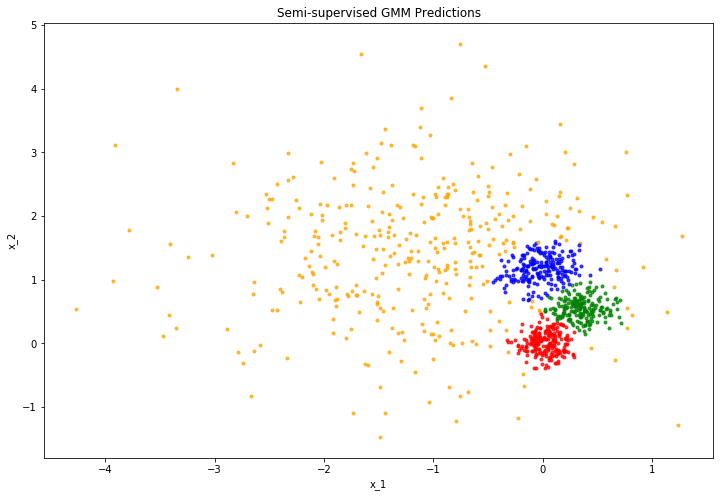

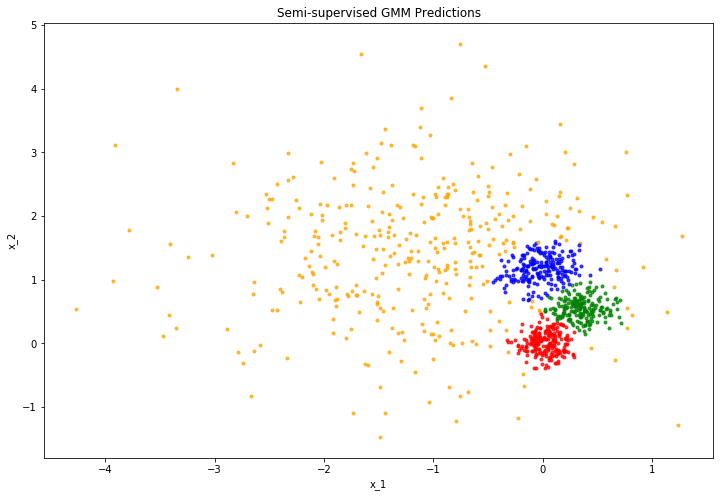

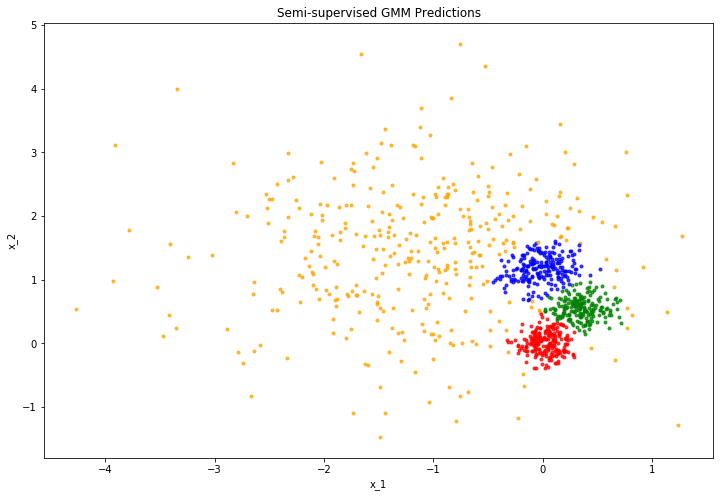

In [10]:
if __name__ == '__main__':
    np.random.seed(220)
    # Run NUM_TRIALS trials to see how different initializations
    # affect the final predictions with and without supervision
    for t in range(NUM_TRIALS):
        #main(is_semi_supervised=False, trial_num=t)

        # *** START CODE HERE ***
        # Once you've implemented the semi-supervised version,
        # uncomment the following line.
        # You do not need to add any other lines in this code block.
        main(is_semi_supervised=True, trial_num=t)
        # *** END CODE HERE ***

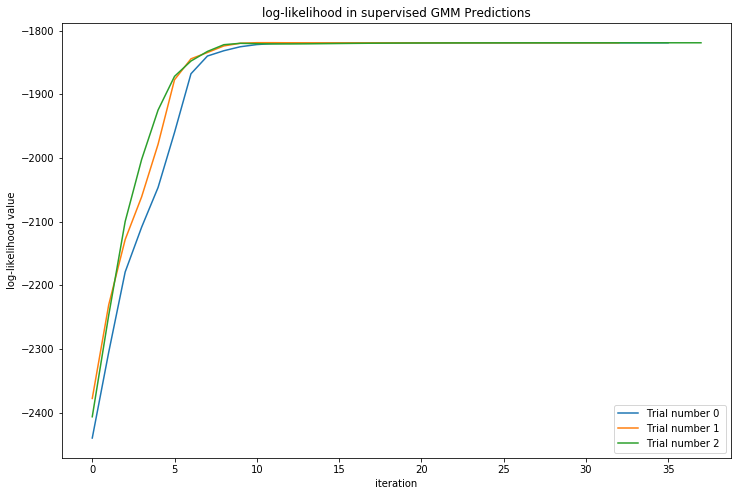

In [11]:
plt.figure(figsize=(12, 8))
plt.title('log-likelihood in supervised GMM Predictions')
plt.xlabel('iteration')
plt.ylabel('log-likelihood value')
for k in range(NUM_TRIALS):
    plt.plot(log_likelihood_list_2[k], label = 'Trial number {} '.format(k))
plt.legend()
plt.show()

### (f) [3 points] Comparison of Unsupervised and Semi-supervised EM. 

Briefly describe the differences you saw in unsupervised vs. semi-supervised EM for each of the following: 

> i. Number of iterations taken to converge.

> ii. Stability (i.e., how much did assignments change with different random initializations?) 

>iii. Overall quality of assignments.


__Note:__ The dataset was sampled from a mixture of three low-variance Gaussian distributions, and a fourth, high-variance Gaussian distribution. This should be useful in determining the overall quality of the assignments that were found by the two algorithms.

### Answer:

> i. Number of iteration taken to converge in semi-supervised EM is extremely less than that in unsupervised EM.

>ii. In unsupervised EM, with different random initializations we have different assignments, specially in dealing with high variance distribution, but in semi-supervised EM the assignments are exactly the same even with different random initializations.

>iii. Although, both supervised EM did its job not bad, the semi-supervised EM is much more robust with different initializations and also working with high variance distributions.